**EMAIL SPAM DETECTION**

By Shivadharshini G

Accuracy: 0.96
Confusion Matrix:
[[1453    0]
 [  67  152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.69      0.82       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



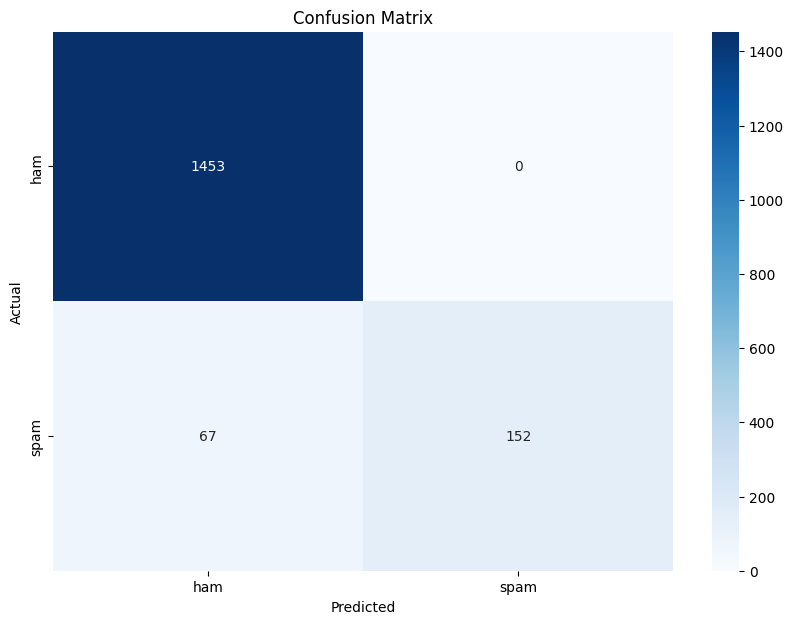

Message: Congratulations! You've won a $1000 gift card. Call now to claim your prize!
Prediction: spam

Message: Hi, just checking in to see how you're doing. Let's catch up soon.
Prediction: ham

Message: You have been selected for a free trial of our premium service. Reply YES to accept.
Prediction: ham

Message: Dinner plans tonight? Let me know what time works for you.
Prediction: ham



In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]  # Select relevant columns
data.columns = ['label', 'message']

# Encode labels
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split data into features and target
X = data['message']
y = data['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with a text vectorizer and a Naive Bayes classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to token counts
    ('tfidf', TfidfTransformer()),  # Convert counts to term-frequency times inverse document-frequency
    ('clf', MultinomialNB())  # Classify using Naive Bayes
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Example of using the model
def predict_spam(message):
    prediction = pipeline.predict([message])
    return 'spam' if prediction[0] == 1 else 'ham'

# Test the model with some examples
test_messages = [
    "Congratulations! You've won a $1000 gift card. Call now to claim your prize!",
    "Hi, just checking in to see how you're doing. Let's catch up soon.",
    "You have been selected for a free trial of our premium service. Reply YES to accept.",
    "Dinner plans tonight? Let me know what time works for you.",
]

for msg in test_messages:
    print(f'Message: {msg}')
    print(f'Prediction: {predict_spam(msg)}\n')


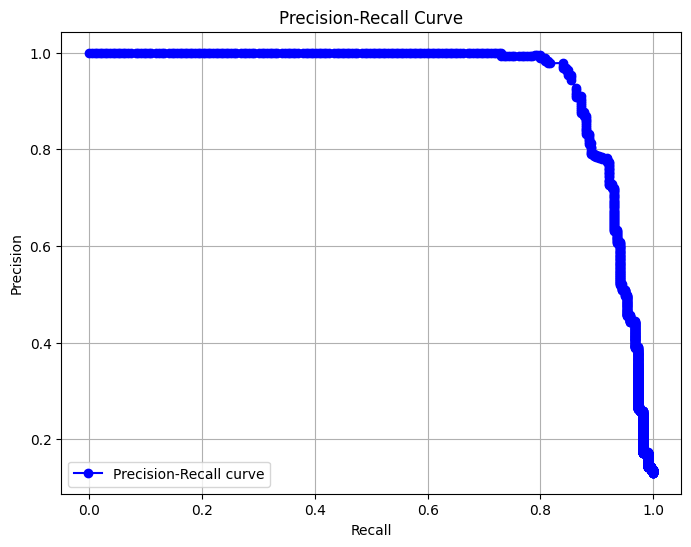

In [2]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get prediction probabilities
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


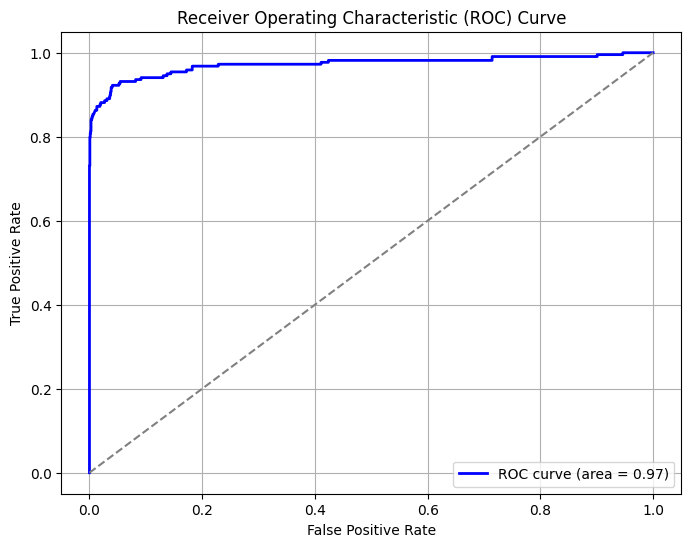

In [3]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


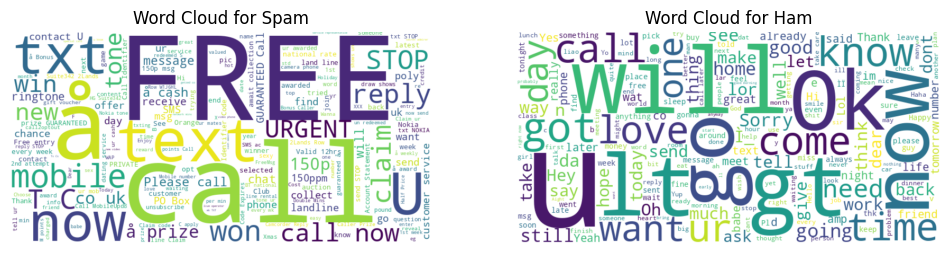

In [4]:
from wordcloud import WordCloud

# Get feature names
feature_names = pipeline.named_steps['vect'].get_feature_names_out()

# Create a matrix of words and their frequencies
spam_words = ' '.join([msg for msg, label in zip(X, y) if label == 1])
ham_words = ' '.join([msg for msg, label in zip(X, y) if label == 0])

# Generate word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

# Plot word clouds
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham')
plt.axis('off')

plt.show()


<ipython-input-5-4af8f0309b69>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=spam_df, palette='Reds')
<ipython-input-5-4af8f0309b69>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=ham_df, palette='Blues')


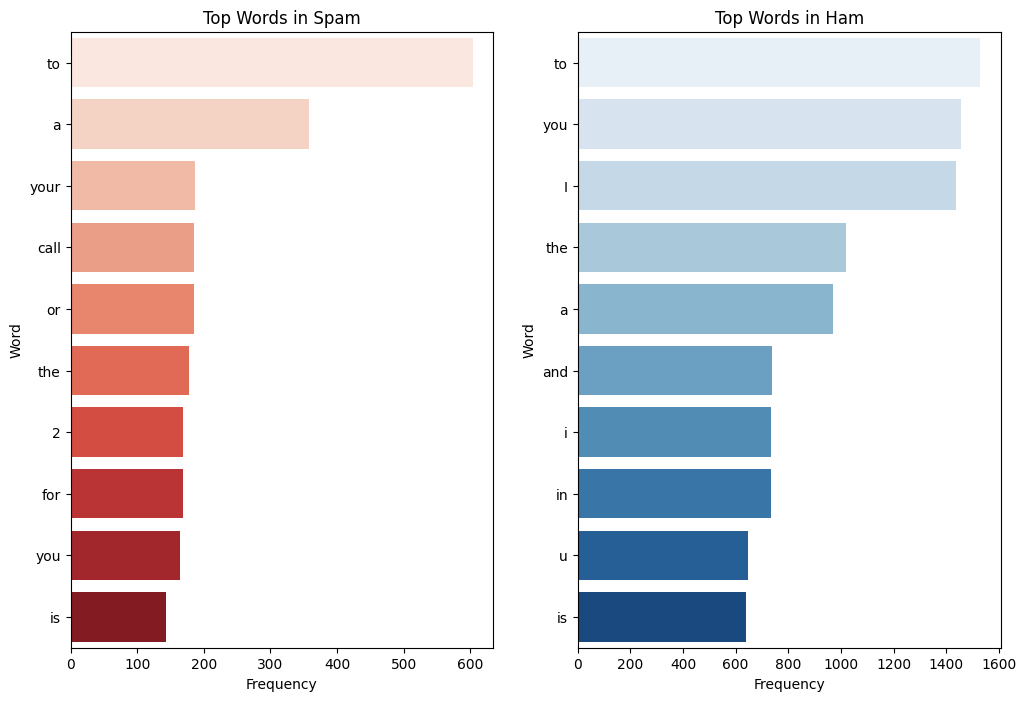

In [5]:
from collections import Counter

# Tokenize and count words
spam_tokens = ' '.join([msg for msg, label in zip(X, y) if label == 1]).split()
ham_tokens = ' '.join([msg for msg, label in zip(X, y) if label == 0]).split()

spam_counts = Counter(spam_tokens)
ham_counts = Counter(ham_tokens)

# Get top 10 words
top_spam_words = spam_counts.most_common(10)
top_ham_words = ham_counts.most_common(10)

# Convert to DataFrame for easier plotting
spam_df = pd.DataFrame(top_spam_words, columns=['Word', 'Frequency'])
ham_df = pd.DataFrame(top_ham_words, columns=['Word', 'Frequency'])

# Plot top words
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=spam_df, palette='Reds')
plt.title('Top Words in Spam')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=ham_df, palette='Blues')
plt.title('Top Words in Ham')

plt.show()
